# Data Analysis and Visualization - 094295
### HW 1 - Box Office Revenue Prediction
### Nitzan Shamir 206348187 & Omer Shubi 312236219

In this project we have three main tasks.

The first is to perform explanatory data analysis (EDA).

The second is to peform feature engineering.

And finally, perform prediction for the revenue of each movie by different methods.

Note, we hide the code cells so that the notebook stays clean. The full code is in the included in the repository.

## EDA
In this phase we explore the data. We perform a basic analysis of the raw data.

We display the raw data, the data type of each feature and summary statistics for the different features (dividing by numeric/categorical).
 and for both the train data and the test data.

In [2]:
import argparse
import numpy as np
import pandas as pd
import csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
def basic_analysis(data):
    print(f"{'-'*10}Data Display{'-'*10}")
    display(data.head())
    print(f"{'-'*10}Number of rows is {len(data)}{'-'*10}")
    print(f"{'-'*10}Feature Types{'-'*10}")
    display(pd.DataFrame(data.dtypes, columns = ['Type']))
    print(f"{'-'*10}Summary Statistics for Numerical Features{'-'*10}")
    display(data.describe())
    print(f"{'-'*10}Summary Statistics for Categorial Features{'-'*10}")
    display(data.describe(include=['object', 'bool']))

In [4]:
def distribution_analysis(data):
    sns.pairplot(data.select_dtypes(exclude=['bool']), hue='type')

In [24]:
def missing_data(data):
    print(f"{'-'*10}Number of None Values Per Feature{'-'*10}")
    display(pd.DataFrame(pd.isna(data).sum(), columns = ['Count']))
    print(f"{'-'*10}Number of Zeros Values Per Numerical Feature{'-'*10}")
    display(pd.DataFrame((data == 0).sum(axis=0), columns = ['Count']))
    print(f"{'-'*10}Number of Empty Values Per Categorial Feature{'-'*10}")
    display(pd.DataFrame(((data == '[]') | (data == '') | (data == '{}')).sum(axis=0), columns = ['Count']))

# EDA for train.tsv
## Basic Analysis

In [23]:
train_path = 'train.tsv'
train_data = pd.read_csv(train_path, sep="\t", index_col='id')
basic_analysis(train_data)



----------Data Display----------


,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
559,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
50719,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
469062,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
9003,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
11153,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."


----------Number of rows is 5215----------
----------Feature Types----------


,Type
backdrop_path,object
belongs_to_collection,object
budget,int64
genres,object
homepage,object
imdb_id,object
original_language,object
original_title,object
overview,object
popularity,float64


----------Summary Statistics for Numerical Features----------


,budget,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


----------Summary Statistics for Categorial Features----------


,backdrop_path,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video,Keywords,cast,crew
count,4638,1065,5215,1766,5200,5215,5215,5209,5048,5215,5215,5215,5215,5215,4190,5215,5215,5215,5215,5215
unique,4638,711,1257,1754,5200,43,5161,5206,5048,4261,484,3782,591,1,4181,5154,2,4709,5206,5209
top,/fgkl3111hQd4sTlKdBnaRXSO0dY.jpg,"{'id': 645, 'name': 'James Bond Collection', '...","[{'id': 18, 'name': 'Drama'}]",http://www.americanreunionmovie.com/,tt0119004,en,Endless Love,The Tulse Luper Suitcases reconstructs the lif...,/9BIsqTMElJHk6oiEmywixPkaECO.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2014-12-25,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You never forget your first love.,Pulse,False,[],[],[]
freq,1,18,404,2,1,4385,2,2,1,170,3016,7,3176,5215,2,3,5197,400,10,7


## Missing Data

In [25]:
missing_data(train_data)

----------Number of None Values Per Feature----------


,Count
backdrop_path,577
belongs_to_collection,4150
budget,0
genres,0
homepage,3449
imdb_id,15
original_language,0
original_title,0
overview,6
popularity,0


----------Number of Zeros Values Per Numerical Feature----------


,Count
backdrop_path,0
belongs_to_collection,0
budget,1487
genres,0
homepage,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


----------Number of Empty Values Per Categorial Feature----------


,Count
backdrop_path,0
belongs_to_collection,0
budget,0
genres,14
homepage,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


# EDA for test.tsv
## Basic Analysis

In [26]:
test_path = 'test.tsv'
test_data = pd.read_csv(test_path, sep="\t", index_col='id')
basic_analysis(test_data)

----------Data Display----------


,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
395992,/nNh7vHHISVAaziJEqAq0P9iL52w.jpg,NaN,58000000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://www.lifemovie.com/,tt5442430,en,Life,The six-member crew of the International Space...,17.409,...,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Be careful what you search for,Life,False,6.4,4738,"[{'id': 839, 'name': 'planet mars'}, {'id': 48...","[{'cast_id': 0, 'character': 'Dr. David Jordan...","[{'credit_id': '58bd72b0c3a3686630048e38', 'de..."
20832,/7dadBR1sXrl1TTzRQYNGUvQinF4.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,tt1182908,hi,क्रैजी 4,A psychiatrist spends the majority of his time...,2.257,...,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Krazzy 4,False,4.6,19,[],"[{'cast_id': 4, 'character': 'Raja', 'credit_i...","[{'credit_id': '5cab55c7925141565402137b', 'de..."
15789,/ijDUMFmb34Fv7jBwxzhNc3lbVP3.jpg,"{'id': 410261, 'name': 'A Goofy Movie Collecti...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",NaN,tt0113198,en,A Goofy Movie,"Though Goofy always means well, his amiable cl...",13.558,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It’s hard to be cool... when your dad’s Goofy.,A Goofy Movie,False,6.9,964,"[{'id': 970, 'name': 'parent child relationshi...","[{'cast_id': 2, 'character': 'Goofy Goof (voic...","[{'credit_id': '591464b9925141583c00cea9', 'de..."
265180,/kb3RNnn4CMPRSaGbrX1ejc7lcRN.jpg,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt2802154,ru,Левиафан,"In a Russian coastal town, Kolya is forced to ...",7.158,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Leviathan,False,7.5,447,"[{'id': 1415, 'name': 'small town'}, {'id': 19...","[{'cast_id': 3, 'character': 'Nikolay', 'credi...","[{'credit_id': '5b9c25890e0a266e12001f38', 'de..."
10098,/wEo4UtBAWdB4aOmQ9wRjI1aS7Dt.jpg,NaN,250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0012349,en,The Kid,A tramp cares for a boy after he's abandoned a...,10.523,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,6 reels of Joy.,The Kid,False,8.2,1008,"[{'id': 290, 'name': 'angel'}, {'id': 1252, 'n...","[{'cast_id': 10, 'character': 'A Tramp', 'cred...","[{'credit_id': '52fe43269251416c75005611', 'de..."


----------Number of rows is 1738----------
----------Feature Types----------


,Type
backdrop_path,object
belongs_to_collection,object
budget,int64
genres,object
homepage,object
imdb_id,object
original_language,object
original_title,object
overview,object
popularity,float64


----------Summary Statistics for Numerical Features----------


,budget,popularity,revenue,runtime,vote_average,vote_count
count,1.738000e+03,1738.000000,1.738000e+03,1736.000000,1738.000000,1738.000000
mean,2.196666e+07,10.021152,6.880591e+07,108.687212,6.396145,1027.665708
std,3.744229e+07,8.557270,1.614473e+08,22.371260,0.902789,1993.455300
min,0.000000e+00,1.508000,1.000000e+00,0.000000,2.000000,1.000000
25%,0.000000e+00,6.379750,2.404700e+06,94.000000,5.800000,79.000000
50%,7.000000e+06,8.855000,1.534260e+07,105.000000,6.400000,287.000000
75%,2.575000e+07,11.618000,6.205116e+07,119.000000,7.000000,914.500000
max,3.560000e+08,221.327000,2.797801e+09,332.000000,10.000000,14471.000000


----------Summary Statistics for Categorial Features----------


,backdrop_path,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video,Keywords,cast,crew
count,1568,354,1738,607,1737,1738,1738,1737,1688,1738,1738,1738,1738,1738,1392,1738,1738,1738,1738,1738
unique,1568,311,604,606,1737,29,1730,1736,1688,1511,255,1530,277,1,1390,1728,2,1569,1732,1736
top,/joo7SLdJetbDceL0iojTXXYXLST.jpg,"{'id': 1570, 'name': 'Die Hard Collection', 'p...","[{'id': 18, 'name': 'Drama'}]",http://www.missionimpossible.com/,tt0469021,en,The King and I,"With friends like these, who needs enemies? Th...",/9v2TpOuuneETKHgovuQ1KcVfNVN.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-09,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A love story.,Child's Play,False,[],[],[]
freq,1,4,134,2,1,1417,2,2,1,52,990,4,1022,1738,2,2,1732,137,7,3


## Missing Data

In [27]:
missing_data(test_data)

----------Number of None Values Per Feature----------


,Count
backdrop_path,170
belongs_to_collection,1384
budget,0
genres,0
homepage,1131
imdb_id,1
original_language,0
original_title,0
overview,1
popularity,0


----------Number of Zeros Values Per Numerical Feature----------


,Count
backdrop_path,0
belongs_to_collection,0
budget,494
genres,0
homepage,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


----------Number of Empty Values Per Categorial Feature----------


,Count
backdrop_path,0
belongs_to_collection,0
budget,0
genres,5
homepage,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0


So far we saw that the data contains 27 features, including the revenue, which provide information about different movies.

The data consists of a few thousands records and there are features of types - boolean, float, integers, string, arrays and nested objects with more fields structured inside.

For each categorical feature we show the number of unique values, the most frequent value and its count.

For numerical we show the median, mean, std and quantiles.

In order to use the categorical info, such as crew and cast, we will need to perform more preprocessing steps.

To identify missing data we look both at NaN values but also at zeros for numerical features and empty strings\dicts for the categorical features.

We see that most fields don't have any missing data, some have a few missing values and a few are almost all missing.

# Feature Distributions and Feature Comparisons for train & test

The graph below shows pairwise relationships between the different numerical features in the data.
The on-diagonal subplots relate to the distribution of the features.

The graph refers to both the training data and the test data.


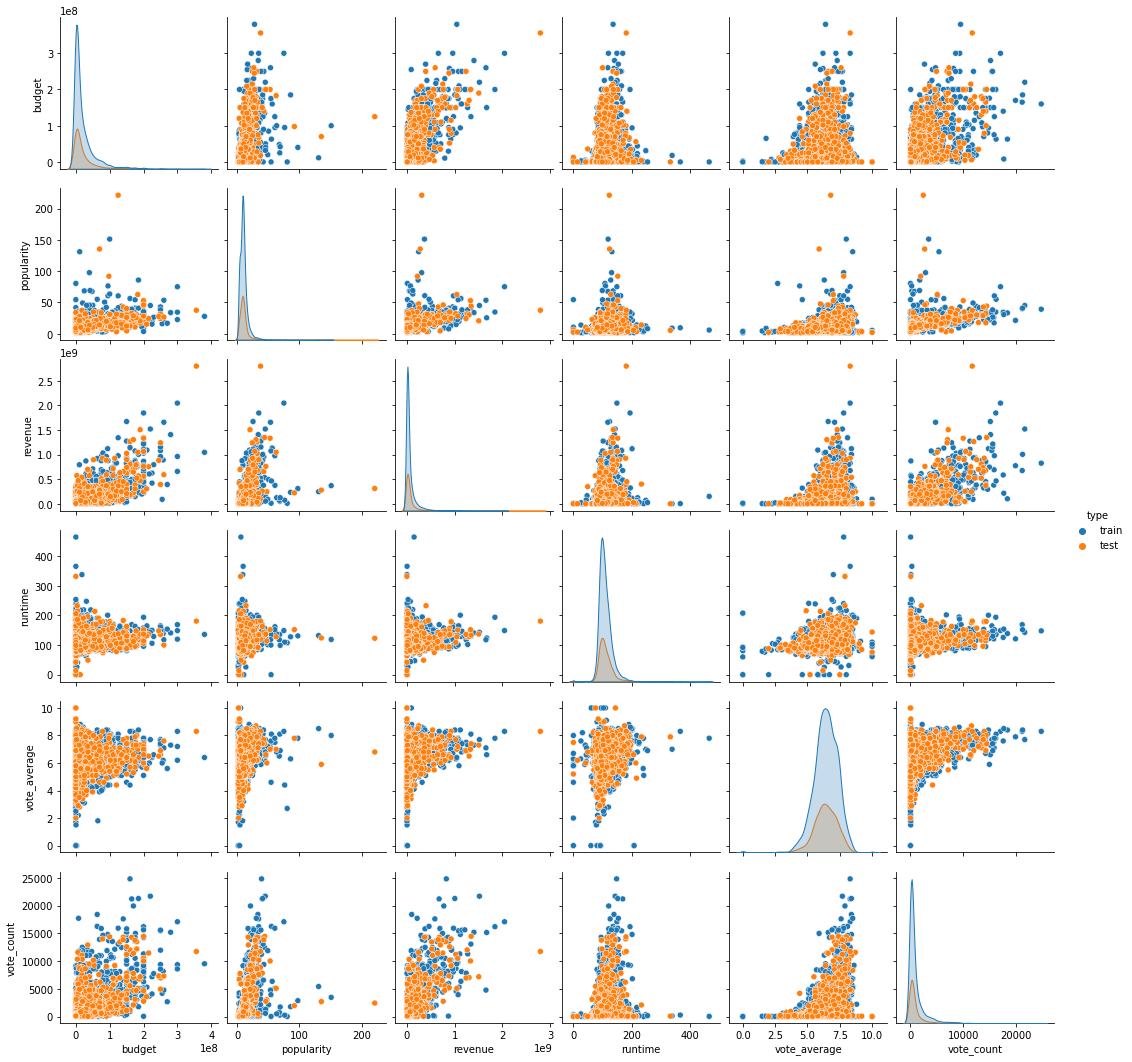

In [9]:
train_data["type"] = 'train'
test_data["type"] = 'test'
data = pd.concat([train_data,test_data])
distribution_analysis(data)



We can see for example that there is some correlation between revenue and vote_count. This can be helpful in the prediction task.
However, runtime and revenue seem pretty uncorrelated.


## Zoom on Feature Distributions and Comparisons

As the data includes outliers (some of them blockbusters) we plot an additional graph without them,
for easier visual analysis.


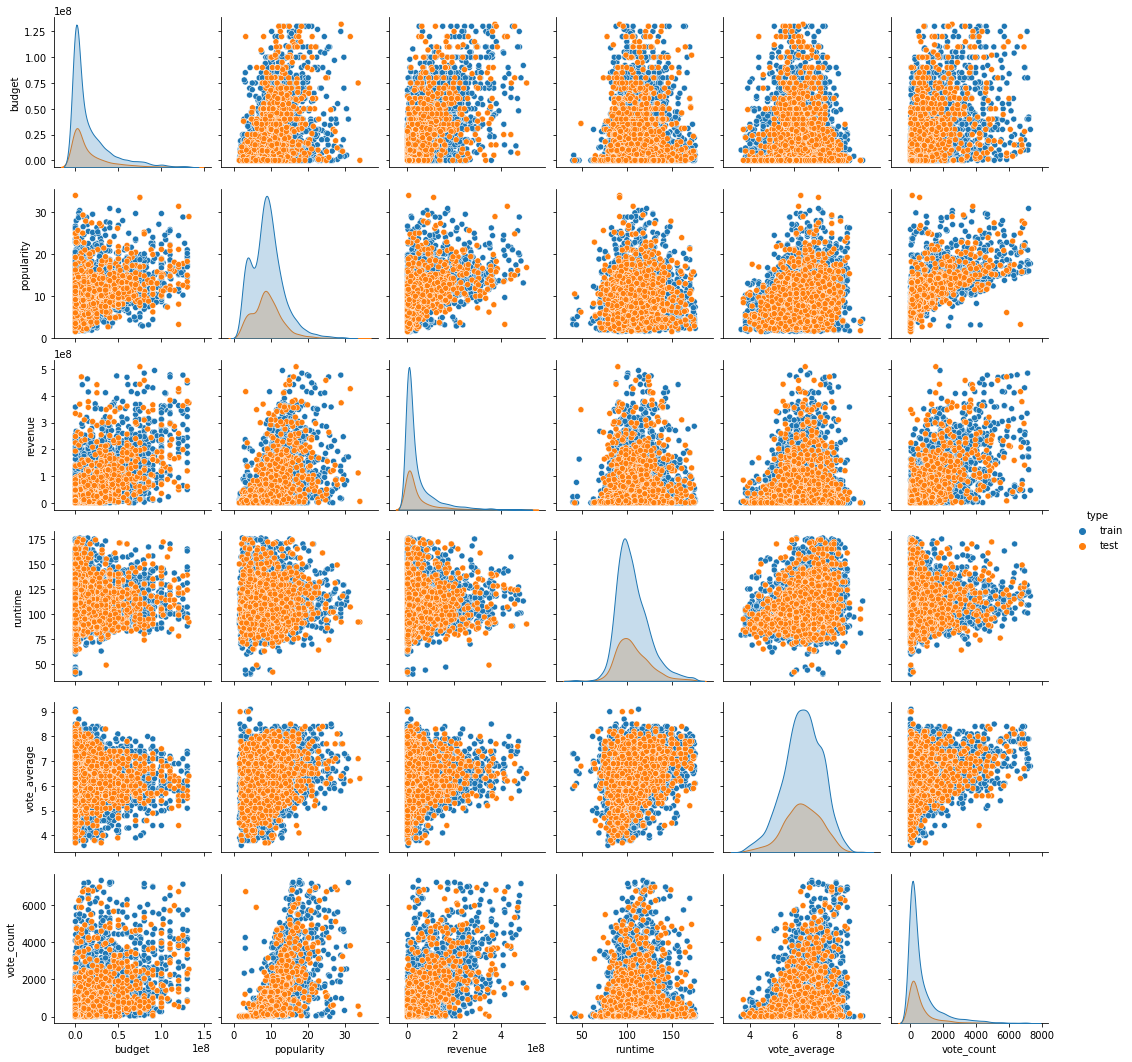

In [10]:
train_data_inliers = train_data.select_dtypes(include=['float64','int64'])
train_data_inliers = train_data_inliers[train_data_inliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
train_data_inliers["type"] = 'train'
test_data_inliers = test_data.select_dtypes(include=['float64','int64'])
test_data_inliers = test_data_inliers[test_data_inliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
test_data_inliers["type"] = 'test'
data_inliers = pd.concat([train_data_inliers,test_data_inliers])
distribution_analysis(data_inliers)

In general, we can see a wide spread of values for all the features.
This can make the prediction task harder, as there aren't clear features and relations between them.
We can expect to need a more sophisticated method than for example a simple linear regression in order to
perform the task well.

# Heatmap

Another method to visual the relation between the features is to look at the heatmap of pairwise correlation.

In general, pearson correlation is between -1 and 1, where 1 is highly positively correlated, -1 is highly negatively correlated, and zero means no correlation.

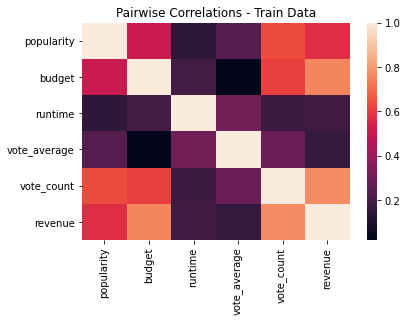

In [13]:
cols = ["popularity", "budget", "runtime", "vote_average", "vote_count", "revenue"]
sns.heatmap(train_data[cols].corr())
plt.title('Pairwise Correlations - Train Data')
plt.show()

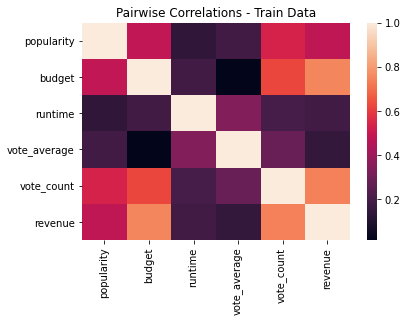

In [17]:
cols = ["popularity", "budget", "runtime", "vote_average", "vote_count", "revenue"]
plt.title('Pairwise Correlations - Train Data')
sns.heatmap(test_data[cols].corr())
plt.show()

As we thought before based on the visual scatter plots, we can now see empirically that both vote_count and budget are relatively highly correlated with the revenue.

## Feature Engineering

In this phase we perform feature engineering.

We describe which features we will be using for the prediction task.
We start by performing basic selections, transformations, handling missing data and data enrichment.

After the EDA, we have a better understanding of each feature and therefore perform the following steps-

1. Remove features that we consider irrelevant - backdrop_path, homepage, imdb_id (no external data) and poster_path.

2. Remove status feature as there is only one unique value.

3. For numerical features of popularity, budget, runtime, vote-average and vote_count we perform standardisation and normalization,
 so that the features will have the same scale.

4. For categorical features we have several preprocessing steps -
    1. Parse each record into the correct format, whether it is a list of dicts, a dict, etc. Meaning flattening nested objects.
    2. Select the which sub feature to use. For example, for belongs_to_collection we keep only the collection name. The extraction list is:
        - belongs_to_collection - 1 Dict of id,name, poster_path, backdrop_path -> save name as collection name.
        - genres - list of Dicts of id, name -> save list of names.
        - production_companies  - list of Dicts of id, logo_path, name, origin_country -> save list of names.
        - spoken_languages - list of Dicts of iso_639_1, name -> save list of names.
        -  production_countries - list of Dicts of iso_3166_1, name -> save list of names.
        -  Keywords - array of dicts of id, name -> save list of names.
        - cast - array of dicts of cast_id, character, credit_id, gender, id, name, order, profile_path -> save list of names.
        -  crew - array of dicts of credit_id, department, gender,id, job, name, profile_path -> save list of names.
            * We only kept crew members that had a job of Producer/Director/Writer as these seem the most relevant to us and to keep the feature space small enough.
        - For original_title, overview, title and tagline features, we apply an additional stopword removal and normalization to lower case step and saved the list of words.
    3. Create dummy variables from each field. For fields that have many unique values, such as crew members' names, we keep
    only the top K common values.


5. For the release_date feature, as we want to capture the cyclical nature of time,
we perform a more sophisticated enrichment process (without using external data). By cyclical nature we mean that December is close to January, and
Saturday is close to Sunday, but in a simple embedding this is not easily seen.
The features we create are - month, day, weekend and month_sin,month_cos,day_sin,day_cos, where sin and cos features for
 month and day are given by
$x_{\sin }=\sin \left(\frac{2 * \pi * x}{\max (x)}\right)$
and
$x_{\cos }=\cos \left(\frac{2 * \pi * x}{\max (x)}\right).$

6. To handle missing data we apply different steps according to the specific feature -
    - For numerical features as most values are not missing we simply impute the mean value of the feature.
    - For video (boolean feature) we impute with the mode value in the train -'False'
    - For missing release_date we propagate the last valid observation.
    - For each categorical feature we add a binary 'missingness' column which indicates whether the value was missing or not in the original data.


We note that all these preprocessing steps are performed for both the train and test sets, however only the train set is
used to learn the categories and scaling values. For example if we didn't see a crew member name in the train set it won't
have a representation in the test set.




## Model and Feature Selection

In order to select the actual features used by the model, the model itself, and the model's parameters, we make use of  a higher-level approach to machine learning, using the [TPOT](http://epistasislab.github.io/tpot/) library which is a Python Automated Machine Learning tool (AutoML) that optimizes machine learning pipelines using genetic programming. 
Exploring thousands of possible pipelines in order to automatically find the best (hopefully) one (based on the given metric - RMSLE). 

A pipeline refers to the whole process after the initial preprocessing steps that we describe in the Feature Engineering section. It includes additional preprocessing steps, feature selection, models and hyperparameters.

Using TPOT we tried out- 
 1. **Preprocessing** steps such as dimension reduction using FastICA and PCA, and adding polynomial features (up to degree 2).
 2. **Feature selection** using f regression and sklearn's SelectFwe which selects the p-values corresponding to Family-wise error rate, which is used for testing the individual effect of each of many regressors.
 3.  multiple **models** which include - simple linear regression and decision trees, ensembles of decision trees such as random forests, and more advanced methods such as XGBoost.
 4. Each tested model has multiple **hyperparameters**, such as learning rate for the advanced tree based algorithms and the optimization tolerance threshold for the linear models. We provided a range of values for the main parameters.
 5. For **regularization** in the linear models we specify the usage of $l_1$ and $l_2$ regularization and ElasticNet which combines them both. For the decision trees based models we specify the max depth, the minimum number of samples required to split a  node or to determine it a leaf.
 
 
As our VM does not include a GPU, and we do not have alot of training examples, we limit ourself to ML methods such as linear regression and regression trees, and do not make use of neural networks.

For evaluationg each of the pipelines we performed **5-fold cross validation**. 
This means that for each pipeline, we trained it 5 times, each time on 80% of the data and used the remaining 20% for valuation.


We provide for example 3 different pipelines that we tested out and their results:
# TODO



The final pipeline we used to make the revenue prediction consists of:

# TODO
VALUATION 